In [1]:
import pandas as pd
import numpy as np
import prepare
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Marc\miniconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
crime_df = pd.read_csv("../data/Crimes_-_2001_to_Present.csv")

Removing outliers

In [3]:
crime_df = crime_df[(crime_df["Latitude"] > 41.5)&(crime_df["Latitude"] < 42.1)]
crime_df = crime_df[(crime_df["Longitude"] > -87.85)&(crime_df["Longitude"] < -87.52)]

# Plotting Police Stations on Chicago map

In [4]:
police_stations_df =  pd.read_csv("../data/police_stations.csv")

In [5]:
min_latitude = police_stations_df["latitude"].min()
max_latitude = police_stations_df["latitude"].max()
min_longitude = police_stations_df["longitude"].min()
max_longitude = police_stations_df["longitude"].max()

In [6]:
BoundBox = (min_longitude, max_longitude,      
         min_latitude, max_latitude)

In [7]:
chicago_police_map = plt.imread("../images/chicago_map_police3.png")

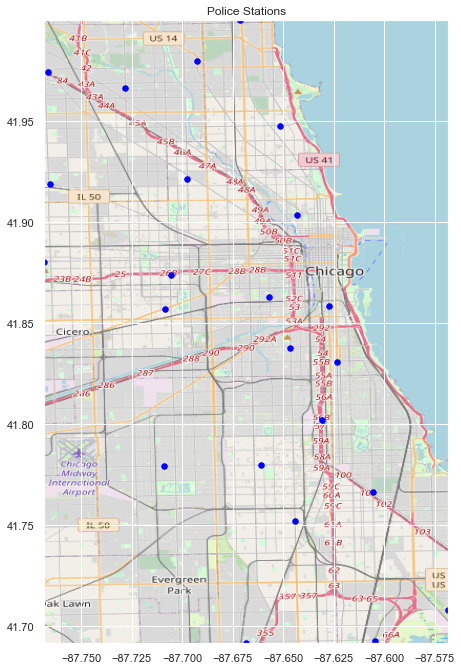

In [76]:
fig, ax = plt.subplots(figsize = (7.237,15))

ax.scatter(police_stations_df.longitude, police_stations_df.latitude, zorder=2, alpha= 1, c='blue', s=30)

ax.set_title('Police Stations')

ax.set_xlim(BoundBox[0],BoundBox[1])
ax.set_ylim(BoundBox[2],BoundBox[3])

ax.imshow(chicago_police_map, zorder=0, extent = BoundBox, aspect= 'equal')
plt.savefig("../images/police_stations.png", bbox_inches='tight')

# Adding all crimes to the Chicago map

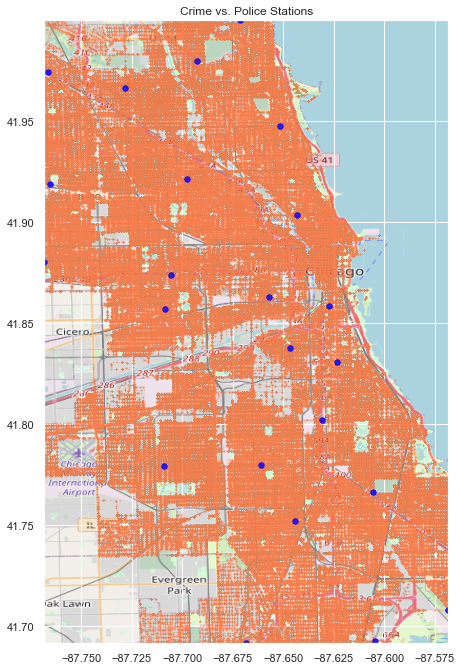

In [82]:
fig, ax = plt.subplots(figsize = (7.237,15))

ax.scatter(police_stations_df.longitude, police_stations_df.latitude, zorder=2, alpha= 0.8, c='blue', s=30)
ax.scatter(crime_df.Longitude, crime_df.Latitude, zorder=1, alpha= 0.08, c='coral', s=0.5)

ax.set_title('Crime vs. Police Stations')

ax.set_xlim(BoundBox[0],BoundBox[1])
ax.set_ylim(BoundBox[2],BoundBox[3])

ax.imshow(chicago_police_map, zorder=0, extent = BoundBox, aspect= 'equal')
plt.savefig("../images/crimes_police_stations.png", bbox_inches='tight')

# Plotting Police Stations vs. Homicides

In [ ]:
homicide_df = prepare.prepare_dataframe(crime_df, "HOMICIDE")

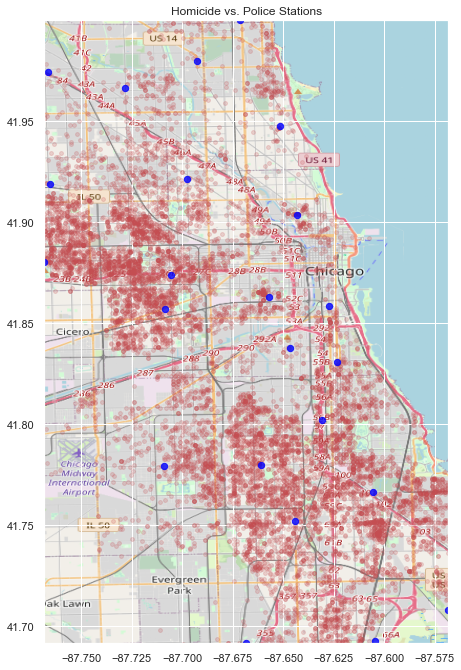

In [78]:
fig, ax = plt.subplots(figsize = (7.237,15))

ax.scatter(police_stations_df.longitude, police_stations_df.latitude, zorder=2, alpha= 0.8, c='blue', s=40)
ax.scatter(homicide_df.Longitude, homicide_df.Latitude, zorder=1, alpha= 0.2, c='r', s=15)

ax.set_title('Homicide vs. Police Stations')

ax.set_xlim(BoundBox[0],BoundBox[1])
ax.set_ylim(BoundBox[2],BoundBox[3])

ax.imshow(chicago_police_map, zorder=0, extent = BoundBox, aspect= 'equal')
plt.savefig("../images/homicides_police_stations.png", bbox_inches='tight')

# Plotting Police Stations vs. Prostitution

In [57]:
prostitution_df = prepare.prepare_dataframe(crime_df, "PROSTITUTION")

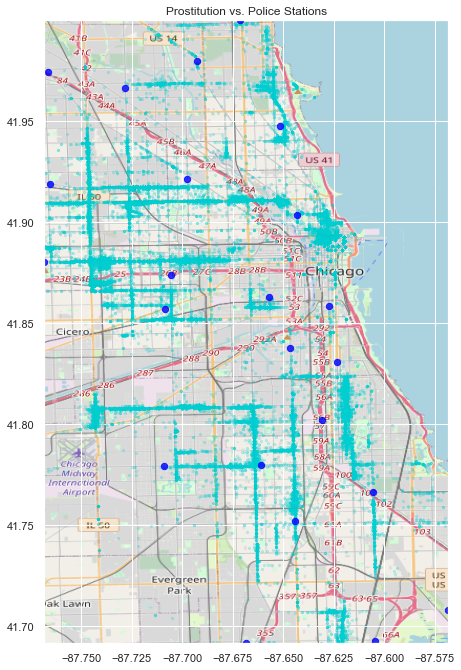

In [79]:
fig, ax = plt.subplots(figsize = (7.237,15))

ax.scatter(police_stations_df.longitude, police_stations_df.latitude, zorder=2, alpha= 0.8, c='blue', s=40)
ax.scatter(prostitution_df.Longitude, prostitution_df.Latitude, zorder=1, alpha= 0.2, c='darkturquoise', s=5)

ax.set_title('Prostitution vs. Police Stations')

ax.set_xlim(BoundBox[0],BoundBox[1])
ax.set_ylim(BoundBox[2],BoundBox[3])

ax.imshow(chicago_police_map, zorder=0, extent = BoundBox, aspect= 'equal')
plt.savefig("../images/prostitution_police_stations.png", bbox_inches='tight')

# Plotting Police Stations vs. Narcotics

In [70]:
drugs_df = prepare.prepare_dataframe(crime_df, "NARCOTICS")

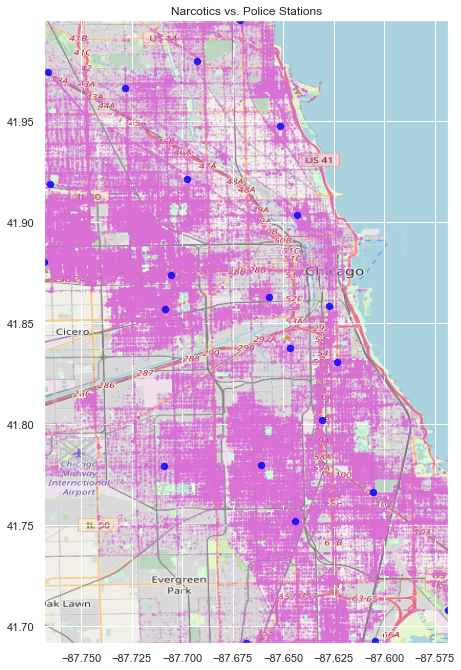

In [80]:
fig, ax = plt.subplots(figsize = (7.237,15))

ax.scatter(police_stations_df.longitude, police_stations_df.latitude, zorder=2, alpha= 0.8, c='blue', s=40)
ax.scatter(drugs_df.Longitude, drugs_df.Latitude, zorder=1, alpha= 0.2, c='orchid', s=1)

ax.set_title('Narcotics vs. Police Stations')

ax.set_xlim(BoundBox[0],BoundBox[1])
ax.set_ylim(BoundBox[2],BoundBox[3])

ax.imshow(chicago_police_map, zorder=0, extent = BoundBox, aspect= 'equal')
plt.savefig("../images/narcotics_police_stations.png", bbox_inches='tight')

# Total of each crime type

In [11]:
crime_type_count = pd.DataFrame(crime_df["Primary Type"].value_counts()).reset_index().rename({"index":"Crime Type", "Primary Type":"Count"},axis="columns")

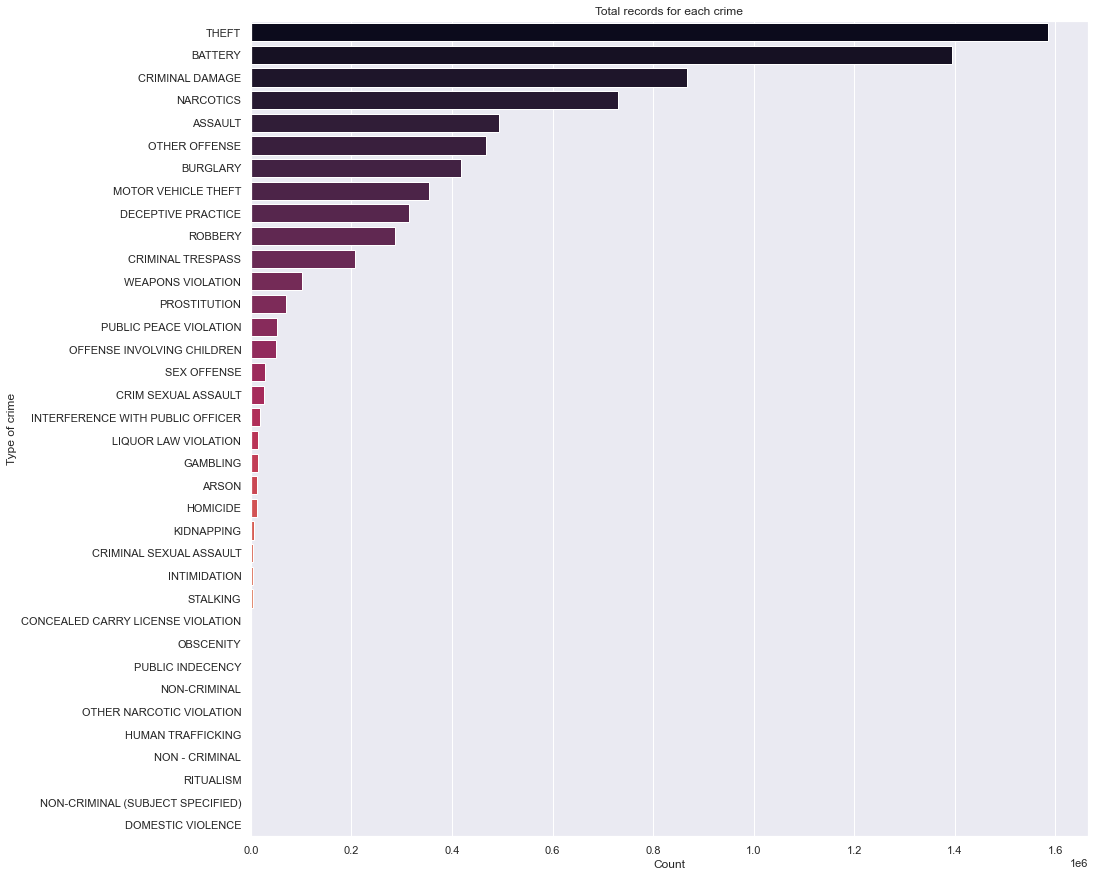

In [83]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.barplot(data=crime_type_count, y="Crime Type", x="Count", palette="rocket")
ax.set(ylabel='Type of crime', title="Total records for each crime")
plt.savefig("../images/total_crime.png", bbox_inches='tight')

# Merging DataFrame with the hardship index

In [13]:
chicago_indexes_df = pd.read_csv("../data/Per_Capita_Income.csv")

In [14]:
correlation_df = prepare.create_correlation_df(crime_df, chicago_indexes_df).reset_index()

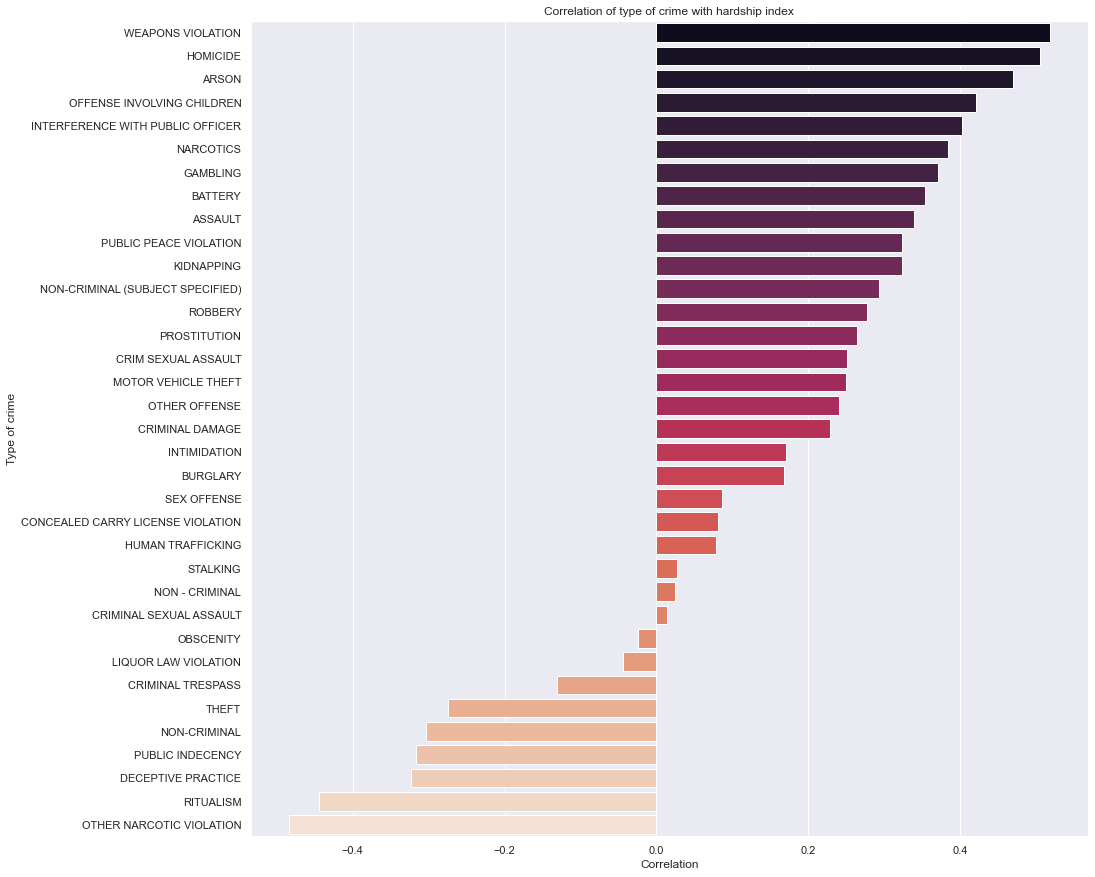

In [84]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.barplot(data=correlation_df, x="Correlation", y="index", palette="rocket")
ax.set(ylabel='Type of crime', title="Correlation of type of crime with hardship index")
plt.savefig("../images/correlation.png", bbox_inches='tight')

In [16]:
homicide_df = prepare.prepare_dataframe(crime_df, "HOMICIDE")

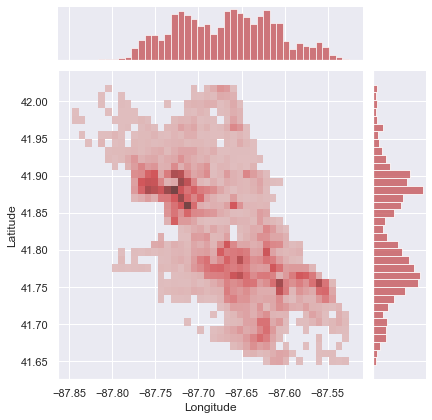

In [90]:
sns.set(rc={'figure.figsize':(15,15)})
sns.jointplot(data=homicide_df, x="Longitude", y="Latitude", kind="hist", color="r")
ax.set(title="Heatmap of homicides since 2001 by location")
plt.savefig("../images/heatmap_homicides.png", bbox_inches='tight')

In [18]:
narcotics_df = prepare.prepare_dataframe(crime_df, "NARCOTICS")

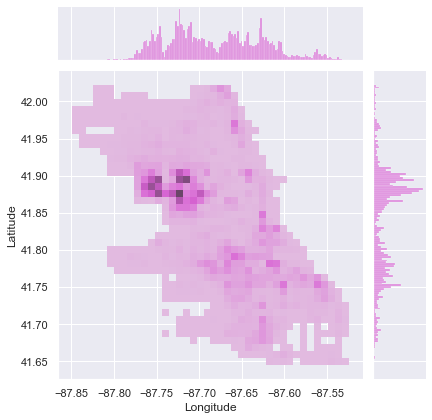

In [91]:
sns.set(rc={'figure.figsize':(15,15)})
sns.jointplot(data=narcotics_df, x="Longitude", y="Latitude", kind="hist", color="orchid", bins=40)
ax.set(title="Heatmap of narcotic related crime since 2001 by location")
plt.savefig("../images/heatmap_narcotics.png", bbox_inches='tight')

In [20]:
theft_df = prepare.prepare_dataframe(crime_df, "THEFT")

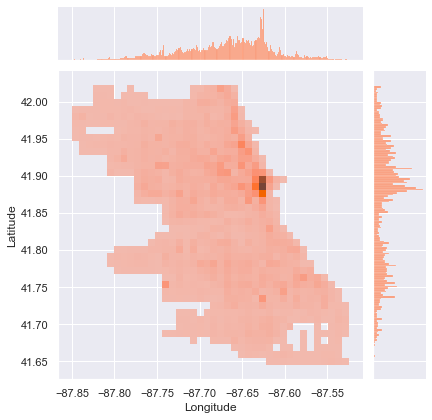

In [99]:
sns.set(rc={'figure.figsize':(15,15)})
sns.jointplot(data=theft_df, x="Longitude", y="Latitude", kind="hist", color="coral", bins=40)
ax.set(title="Heatmap of theft since 2001 by location")
plt.savefig("../images/heatmap_theft.png", bbox_inches='tight')

Near Four Seasons Chicago hotel

In [22]:
gta_df = prepare.prepare_dataframe(crime_df, "MOTOR VEHICLE THEFT")

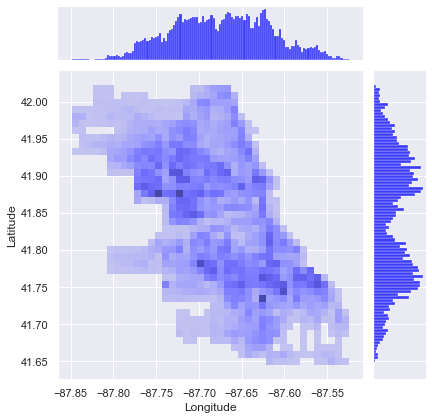

In [100]:
sns.set(rc={'figure.figsize':(15,15)})
sns.jointplot(data=gta_df, x="Longitude", y="Latitude", kind="hist", color="blue", bins=40)
ax.set(title="Heatmap of motor vehicle theft related crime since 2001 by location")
plt.savefig("../images/heatmap_gta.png", bbox_inches='tight')

In [26]:
prostitution_df = prepare.prepare_dataframe(crime_df, "PROSTITUTION")

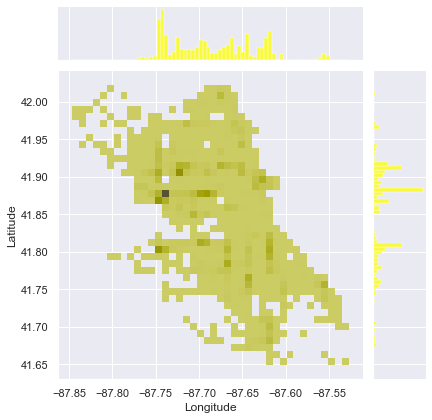

In [101]:
sns.set(rc={'figure.figsize':(15,15)})
sns.jointplot(data=prostitution_df, x="Longitude", y="Latitude", kind="hist", color="yellow", bins=40)
ax.set(title="Heatmap of prostitution since 2001 by location")
plt.savefig("../images/heatmap_prostitution.png", bbox_inches='tight')